# Project_MAAC

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statsmodels.formula.api as smf
import math
import statsmodels.formula.api as sm

In [48]:
data = pd.read_csv('data.csv', sep=';') 

## Data Cleaning & Preparation

### Binning the catogorical data

In [49]:
data['education'] = data['education'].apply(lambda x:'Primary' if 'basic' in x else 'Primary' if 'illiterate' in x else 'Secondary' if 'high.school' in x else 'Secondary' if 'professional.course' in x else 'Tertiary' if 'university.degree' in x else x)
data['job'] = data['job'].apply(lambda x:'Employed' if 'admin.' in x else 'Employed' if 'blue-collar' in x else 'Employed' if 'technician' in x else 'Employed' if 'services' in x else 'Employed' if 'management' in x else 'Employed' if 'self-employed' in x else 'Employed' if 'entrepreneur' in x else 'Unemployed' if 'retired' in x else 'Unemployed' if 'unemployed' in x else 'Unemployed' if 'housemaid' in x else 'Unemployed' if 'student' in x else x)
data['marital'] = data['marital'].apply(lambda x:'single' if 'divorce' in x else x)

### Cleaning the missing values

In [55]:
data['education']=data['education'].replace('unknown',np.NaN)
data['marital']=data['marital'].replace('unknown',np.NaN)
data['housing']=data['housing'].replace('unknown',np.NaN)
data['loan']=data['loan'].replace('unknown',np.NaN)
data['job']=data['job'].replace('unknown',np.NaN)

data.drop(['default'], axis=1, inplace = True)
data.dropna(axis=0, inplace=True)

In [56]:
data['y_dum']= data['y'].map({'no': 0, 'yes': 1})

## Rename the column

In [113]:
data = data.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed'})

## Split the Dataset

In [114]:
# Creating training and testing datasets
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8))
test = data.drop(train.index)

In [115]:
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,y_dum
398,45,Employed,single,Tertiary,no,yes,cellular,may,fri,133,...,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
526,38,Employed,married,Tertiary,no,no,telephone,may,tue,477,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3707,60,Unemployed,married,Secondary,no,no,cellular,may,thu,181,...,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,yes,1
3687,30,Employed,single,Tertiary,no,no,cellular,sep,thu,327,...,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes,1
618,31,Employed,married,Tertiary,no,no,telephone,may,wed,197,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,0


In [116]:
test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,y_dum
6,32,Employed,single,Tertiary,yes,no,cellular,sep,mon,290,...,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
10,25,Employed,single,Primary,yes,no,cellular,jul,thu,301,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
20,55,Employed,married,Primary,yes,no,cellular,jul,tue,326,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0
25,38,Employed,married,Secondary,yes,no,cellular,aug,mon,479,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes,1
26,36,Employed,single,Secondary,no,no,telephone,may,wed,446,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,0


## Data Preparation

### Check Missing Value

In [117]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
y_dum             0
dtype: int64

### Check VIF


In [118]:
train_dummies=pd.get_dummies(train.iloc[:,0:])

In [119]:
X = train_dummies[['age', 'duration','campaign','pdays','previous','emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_Employed', 'marital_married', 'education_Primary', 'housing_no', 'loan_no', 'contact_cellular', 'month_mar', 'poutcome_success', 'day_of_week_fri']]

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["y_dum"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                y_dum            VIF
0               const  683321.112966
1                 age       1.179976
2            duration       1.023457
3            campaign       1.049168
4               pdays      13.636122
5            previous       1.800038
6        emp_var_rate      38.039553
7      cons_price_idx       9.754661
8       cons_conf_idx       2.911788
9           euribor3m      61.875972
10        nr_employed      32.944098
11       job_Employed       1.097603
12    marital_married       1.106985
13  education_Primary       1.084024
14         housing_no       1.019776
15            loan_no       1.007851
16   contact_cellular       2.095999
17          month_mar       1.060823
18   poutcome_success      12.647102
19    day_of_week_fri       1.005511


### Eliminate Variables based on VIF 
Disregard "pdays","emp_var_rate","cons_price_idx","euribor3m","nr_employed","poutcome" because their VIFs are larger than 5.

## EDA

### Visualization Heatmap

<AxesSubplot:>

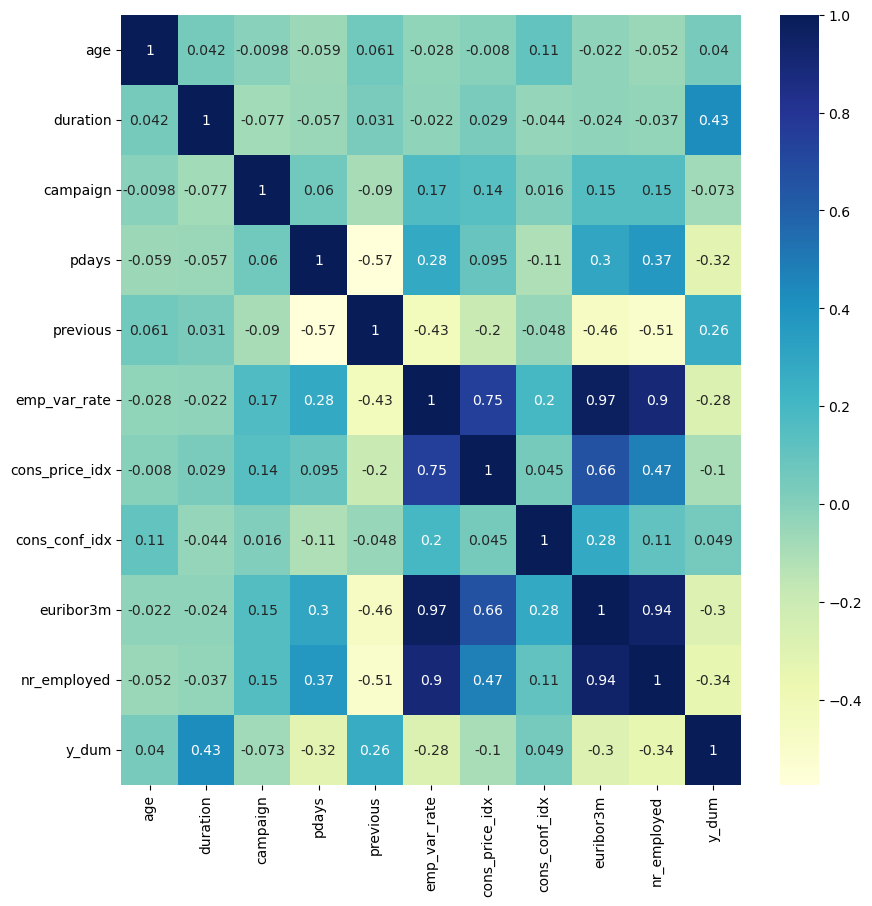

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

### Visualizations with individual predictors

[Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'subscription_rate')]

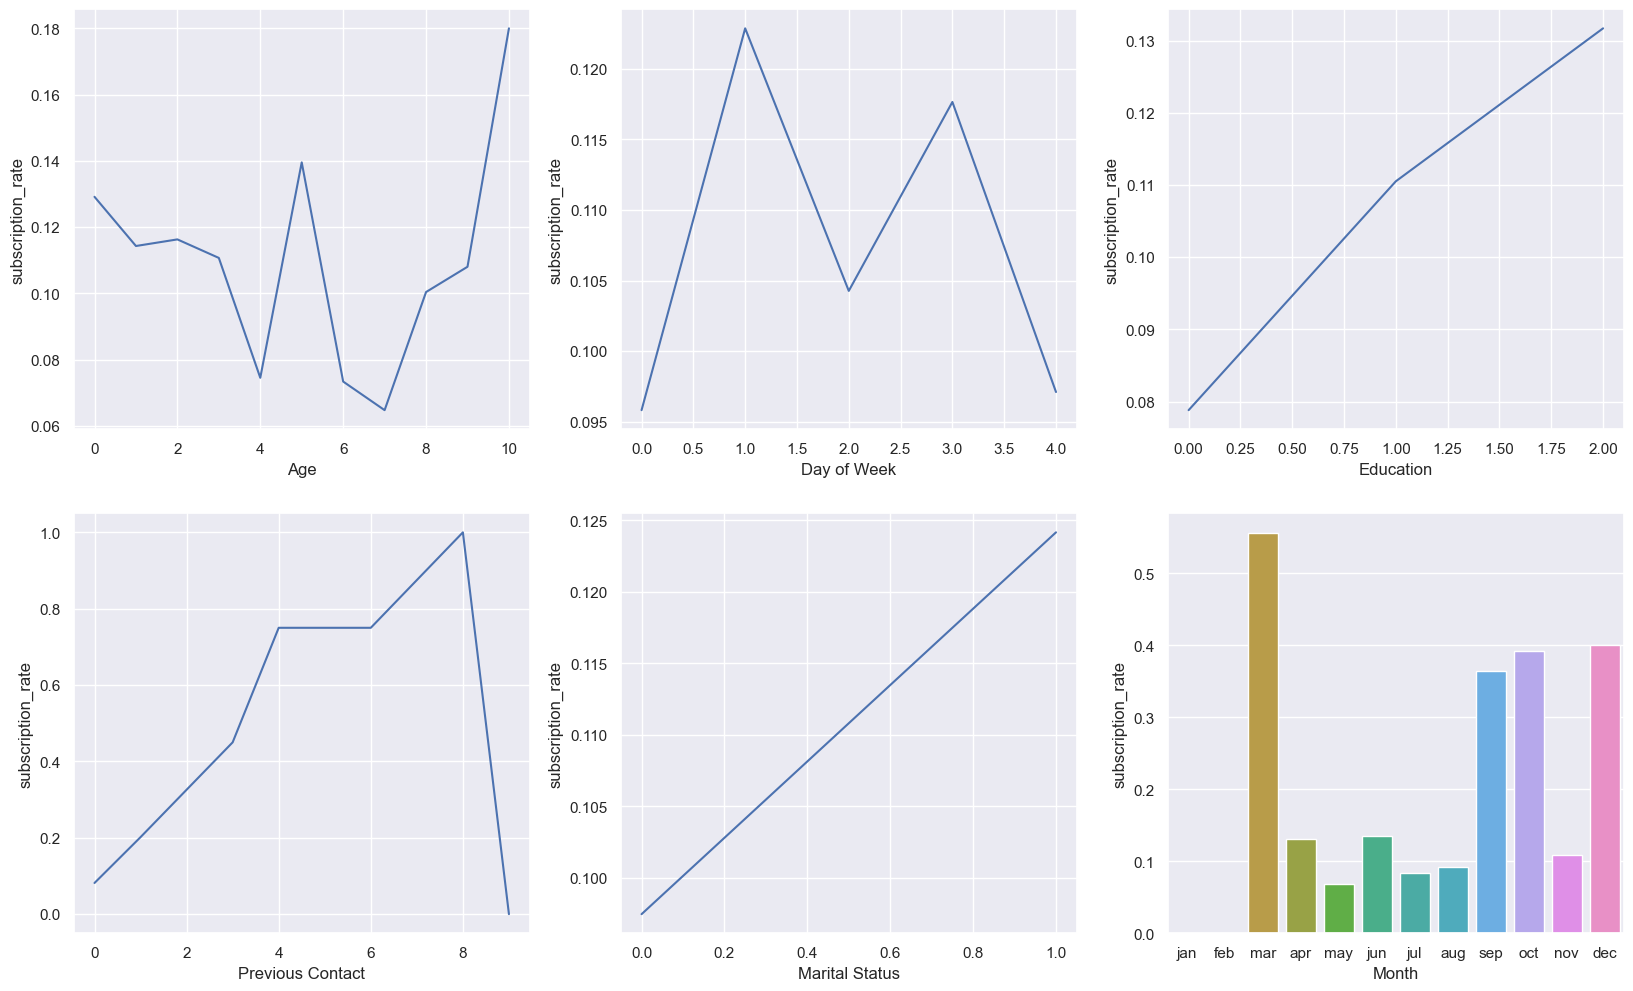

In [122]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(nrows=2, ncols=3)
#Plotting individual subplots

#Binning Age
binned_age = pd.qcut(train['age'],11,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Age Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_age = sns.lineplot(x = age_data.index, y= age_data['subscription_rate'], ax=axes[0,0])
ax_age.set(xlabel='Age', ylabel='subscription_rate')


#Day of Week Graph
day_data = train.groupby('day_of_week')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_day = sns.lineplot(x = day_data.index, y= day_data['subscription_rate'], ax = axes[0,1])
ax_day.set(xlabel='Day of Week', ylabel='subscription_rate')

#Education Graph
edu_data = train.groupby('education')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_edu = sns.lineplot(x = edu_data.index, y= edu_data['subscription_rate'], ax = axes[0,2])
ax_edu.set(xlabel='Education', ylabel='subscription_rate')

#Month Graph
month_data = train.groupby('month')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_month = sns.barplot(x = month_data.index, y= month_data['subscription_rate'], order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], ax = axes[1,2])
ax_month.set(xlabel='Month', ylabel='subscription_rate')


#Binning number of previous contacts
binned_previous = pd.cut(train['previous'],10, retbins=True, duplicates='drop')
train['previous_binned'] = binned_previous[0]
previous_data = train.groupby('previous_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_previous = sns.lineplot(x = previous_data.index, y= previous_data['subscription_rate'], ax = axes[1,0])
ax_previous.set(xlabel='Previous Contact', ylabel='subscription_rate')

#Marital Status Graph
marital_data = train.groupby('marital')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_marital = sns.lineplot(x = marital_data.index, y= marital_data['subscription_rate'], ax = axes[1,1])
ax_marital.set(xlabel='Marital Status', ylabel='subscription_rate')


## Observations from Visualizations
**Age**:A quadratic transformation of age seems to better fit for "Age"

**Day of Week**:

**Education**

**Previous Contact**

## Model

In [130]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Baseline Model

In [143]:
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'y_dum', 'age_binned',
       'previous_binned'],
      dtype='object')

In [144]:
logit_model_Baseline = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+duration+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
logit_model_Baseline.summary()

Optimization terminated successfully.
         Current function value: 0.192001
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3016
Method:                           MLE   Df Model:                           32
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.4388
Time:                        22:42:58   Log-Likelihood:                -585.41
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                1.088e-171
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -200.3501    136.506     -1.468      0.142    -467.897      67.197
job[T.Unemployed]           0.2203      0.228      0.967      0.334      -0.226       0.667
marital[T.single]          -0.0606      0.169     -0.358      0.721      -0.393       0.272
education[T.Secondary]      0.0703      0.211      0.334      0.739      -0.343       0.483
education[T.Tertiary]       0.2458      0.217      1.132      0.258      -0.180       0.671
housing[T.yes]             -0.0255      0.159     -0.160      0.873      -0.337       0.286
loan[T.yes]                -0.0373      0.219     -0.170      0.865      -0.467       0.392
contact[T.telephone]       -1.1262      0.350     -3.222      0.001      -1.811      -0.441
month[T.aug]                0.7073      0.510      1.388      0.165      -0.291       1.706
month[T.dec]                0.4161      0.835      0.499      0.618      -1.220       2.052
month[T.jul]                0.5760      0.454      1.269      0.205      -0.314       1.466
month[T.jun]                1.0164      0.512      1.985      0.047       0.013       2.020
month[T.mar]                2.7532      0.627      4.388      0.000       1.523       3.983
month[T.may]                0.1981      0.378      0.524      0.600      -0.543       0.939
month[T.nov]                0.3272      0.505      0.647      0.517      -0.663       1.318
month[T.oct]                0.8667      0.625      1.387      0.166      -0.358       2.092
month[T.sep]                0.5785      0.702      0.824      0.410      -0.797       1.954
day_of_week[T.mon]          0.4288      0.251      1.708      0.088      -0.063       0.921
day_of_week[T.thu]          0.1608      0.261      0.616      0.538      -0.351       0.672
day_of_week[T.tue]          0.2999      0.256      1.171      0.242      -0.202       0.802
day_of_week[T.wed]          0.2993      0.266      1.125      0.261      -0.222       0.821
poutcome[T.nonexistent]     0.7572      0.367      2.065      0.039       0.038       1.476
poutcome[T.success]         2.3928      0.949      2.522      0.012       0.533       4.252
age                        -0.0080      0.007     -1.070      0.285      -0.023       0.007
duration                    0.0052      0.000     17.663      0.000       0.005       0.006
campaign                   -0.0963      0.053     -1.833      0.067      -0.199       0.007
pdays                       0.0008      0.001      0.799      0.424      -0.001       0.003
previous                    0.3131      0.218      1.438      0.150      -0.114       0.740
euribor3m                  -0.6120      0.492     -1.245      0.213      -1.576       0.352
emp_var_rate               -0.7478      0.524     -1.426      0.154      -1.776       0.280
cons_price_idx              1.6458      0.906      1.816      0.069      -0.130       3.422
cons_conf_idx               0.0969      0.031      3.084      0.002       0.035       0.158
nr_employed          

Classification accuracy = 86.4%
Precision = 43.8%
TPR or Recall = 91.8%
FNR = 8.2%
FPR = 14.3%
ROC-AUC = 94.1%


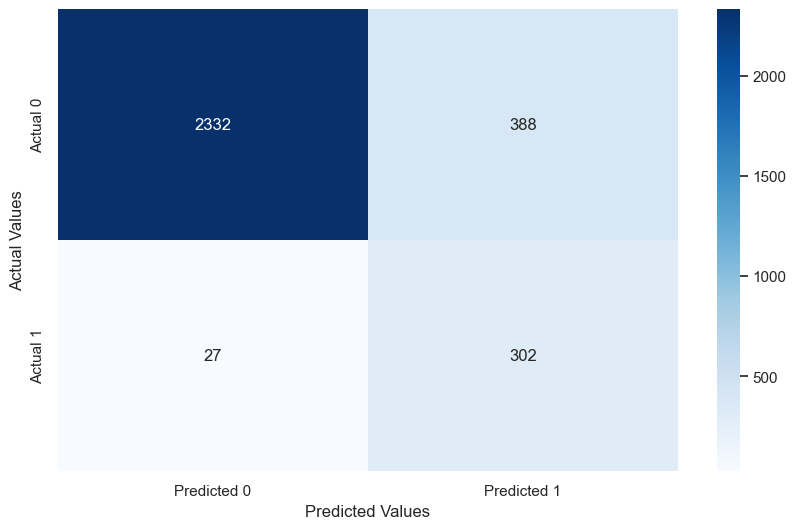

In [145]:
confusion_matrix_data(train,train.y_dum,logit_model_Baseline,0.1)

In [146]:
logit_model = sm.logit(formula = 'y_dum~age+I(age**2)+job+marital+education+housing+loan+contact+month+day_of_week+duration+campaign+previous+cons_conf_idx', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.214862
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3022
Method:                           MLE   Df Model:                           26
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.3720
Time:                        22:43:10   Log-Likelihood:                -655.11
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                7.941e-147
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2584      1.328      1.701      0.089      -0.344       4.861
job[T.Unemployed]          0.4168      0.224      1.858      0.063      -0.023       0.856
marital[T.single]         -0.0734      0.164     -0.447      0.655      -0.395       0.248
education[T.Secondary]     0.2144      0.202      1.061      0.289      -0.182       0.610
education[T.Tertiary]      0.4096      0.207      1.975      0.048       0.003       0.816
housing[T.yes]            -0.0228      0.150     -0.151      0.880      -0.318       0.272
loan[T.yes]               -0.0472      0.206     -0.229      0.819      -0.452       0.357
contact[T.telephone]      -2.0861      0.256     -8.148      0.000      -2.588      -1.584
month[T.aug]              -0.9790      0.405     -2.418      0.016      -1.772      -0.186
month[T.dec]              -0.0173      0.773     -0.022      0.982      -1.533       1.498
month[T.jul]              -0.7724      0.367     -2.104      0.035      -1.492      -0.053
month[T.jun]               1.4141      0.381      3.708      0.000       0.667       2.161
month[T.mar]               2.2496      0.521      4.321      0.000       1.229       3.270
month[T.may]              -0.1588      0.341     -0.465      0.642      -0.828       0.510
month[T.nov]              -0.8010      0.385     -2.080      0.038      -1.556      -0.046
month[T.oct]               0.5694      0.537      1.059      0.289      -0.484       1.623
month[T.sep]               0.2899      0.537      0.540      0.589      -0.763       1.342
day_of_week[T.mon]         0.4853      0.238      2.042      0.041       0.019       0.951
day_of_week[T.thu]         0.2677      0.245      1.094      0.274      -0.212       0.747
day_of_week[T.tue]         0.3489      0.243      1.438      0.150      -0.127       0.824
day_of_week[T.wed]         0.1998      0.255      0.784      0.433      -0.300       0.699
age                       -0.0807      0.040     -2.031      0.042      -0.159      -0.003
I(age ** 2)                0.0008      0.000      1.932      0.053    -1.2e-05       0.002
duration                   0.0048      0.000     17.975      0.000       0.004       0.005
campaign                  -0.1215      0.049     -2.459      0.014      -0.218      -0.025
previous                   0.8289      0.106      7.840      0.000       0.622       1.036
cons_conf_idx              0.1026      0.020      5.182      0.000       0.064       0.141
==========================================================================================
"""

Classification accuracy = 85.1%
Precision = 41.1%
TPR or Recall = 87.5%
FNR = 12.5%
FPR = 15.1%
ROC-AUC = 92.2%


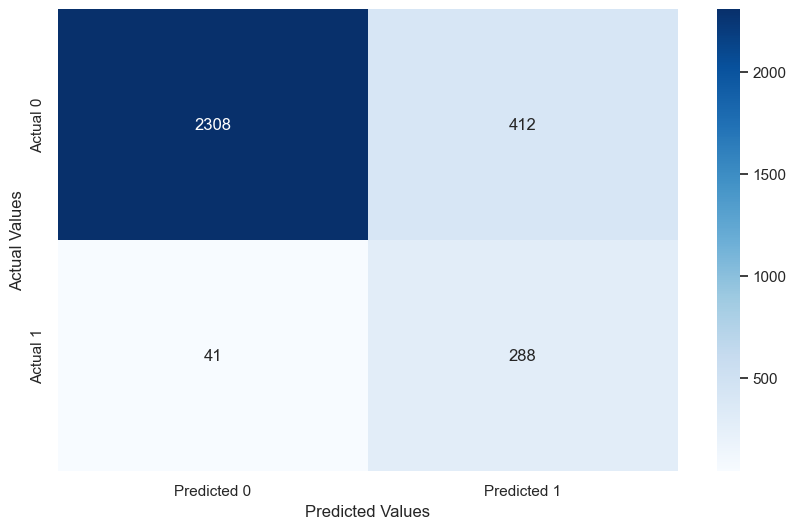

In [155]:
confusion_matrix_data(train,train.y_dum,logit_model,0.1)